<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook diseñada por el Laboratorio de investigaciones en Humanidades Digitales
#### CONICET

##### Diseñada por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo trabajar sobre los texto en formato plano y en los archivos XML realizados para el proyecto [Viaje al Río de la Plata de Ulrico Schmidel](https://github.com/hdlabconicet/viaje-al-rio-de-la-plata), con los mismo se busco generar visualizaciones del análisis textual, así como en las relaciones entre personajes, pueblos originarios en los trayectos y episodios de esta crónica.
Para ello se utilizaron diversas librerías

In [1]:
!pip install spacy
!python -m spacy download es_core_news_md
!pip install networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import os
#os.chdir('c:\\Users\\Adm\\OneDrive - Económicas - UBA\\HD-LAB\\Viaje_al_Rio_de_la_Plata-Ulrico_Schmidel')

In [3]:
# Define the path to your folder
folder_path = '/content/sample_data'
os.chdir(folder_path)

# List all files in the directory
files = os.listdir(folder_path)


Para proceder en el análisis textual trabajaremos en el archivo de texto plano de la obra de Ulrico Schmidel


##### Sumar stopwords del siglo XVI

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data

# Lista de stopwords para el español del siglo XVI
stopwords_siglo_XVI = set({
    'aquel', 'à', 'á', 'i', 'o', 'ó', 'ò', 'aquella', 'aquelos', 'aquelas', 'hast', 'dende', 'dixo', 'dixeron', 'dixieron', 'assí', 'assi', 'desque'
})

# Stopwords estándar y del siglo XVI
nltk_stopwords = set(stopwords.words('spanish'))  # Asegúrate de descargar las stopwords
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas]
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar texto
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas]
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
# Leer el archivo ulrico.txt
with open("/content/ulrico_schmidel_final.txt", "r", encoding="utf-8") as archivo:
    texto = archivo.read()

# Aplicar la función clean_and_tokenize
tokens = clean_and_tokenize(texto)

# Guardar los tokens en un archivo (como texto o como lista)
with open("ulrico_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto

print("Tokens guardados en 'ulrico_tokens.txt'.")

Tokens guardados en 'ulrico_tokens.txt'.


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
import spacy
import pandas as pd

nltk.download('punkt')  # Para la tokenización
nltk.download('averaged_perceptron_tagger')  # Para el etiquetado POS
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_md")

# Leer los tokens del archivo ulrico_tokens.txt
with open("ulrico_tokens.txt", "r", encoding="utf-8") as archivo:
    texto = archivo.read()

# Procesar el texto con spaCy
doc = nlp(texto)

# Crear una lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]

# Convertir la lista a un DataFrame de pandas
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])

# Guardar el DataFrame en un archivo CSV
df.to_csv("etiquetas_pos_ulrico.csv", index=False, encoding="utf-8")

print("Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv


### Cálculo de etiquetas POS

In [12]:

# Contar cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

,count
Etiqueta_POS,
NOUN,4738
VERB,3367
ADJ,2735
PROPN,1336
ADV,1107
DET,383
AUX,253
SCONJ,139
PRON,134


### Cálculo de sustantivos, adjetivos y verbos más comunes y sus gráficos

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
df = pd.read_csv("etiquetas_pos_ulrico.csv")

# Función para obtener las palabras más frecuentes
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Obtener las 10 palabras más frecuentes para cada categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Mostrar las palabras más frecuentes
print("Top 10 Sustantivos:\n", top_nouns)
print("\nTop 10 Adjetivos:\n", top_adjectives)
print("\nTop 10 Verbos:\n", top_verbs)


Top 10 Sustantivos:
 Palabra
capitán    207
gente      127
tierra     121
pueblo     118
leguas      99
millas      98
días        97
agua        90
hombres     84
navíos      77
ciudad      69
camino      68
nación      62
tiempo      60
caríos      59
día         53
mujeres     52
indios      49
cosa        46
navío       44
Name: count, dtype: int64

Top 10 Adjetivos:
 Palabra
general       52
seguida       49
llamada       47
cristianos    46
dicho         38
indios        36
gran          32
singnora      32
llamado       32
pescado       31
grandes       28
grande        27
irala         27
dichos        25
principal     21
buena         20
largo         20
largos        18
visto         18
aluiso        17
Name: count, dtype: int64

Top 10 Verbos:
 Palabra
llegamos       71
hizo           44
comer          42
quedamos       34
hacer          28
marchamos      26
iten           26
llama          23
dijo           23
hacen          22
mandó          21
marchar        20
llegar    

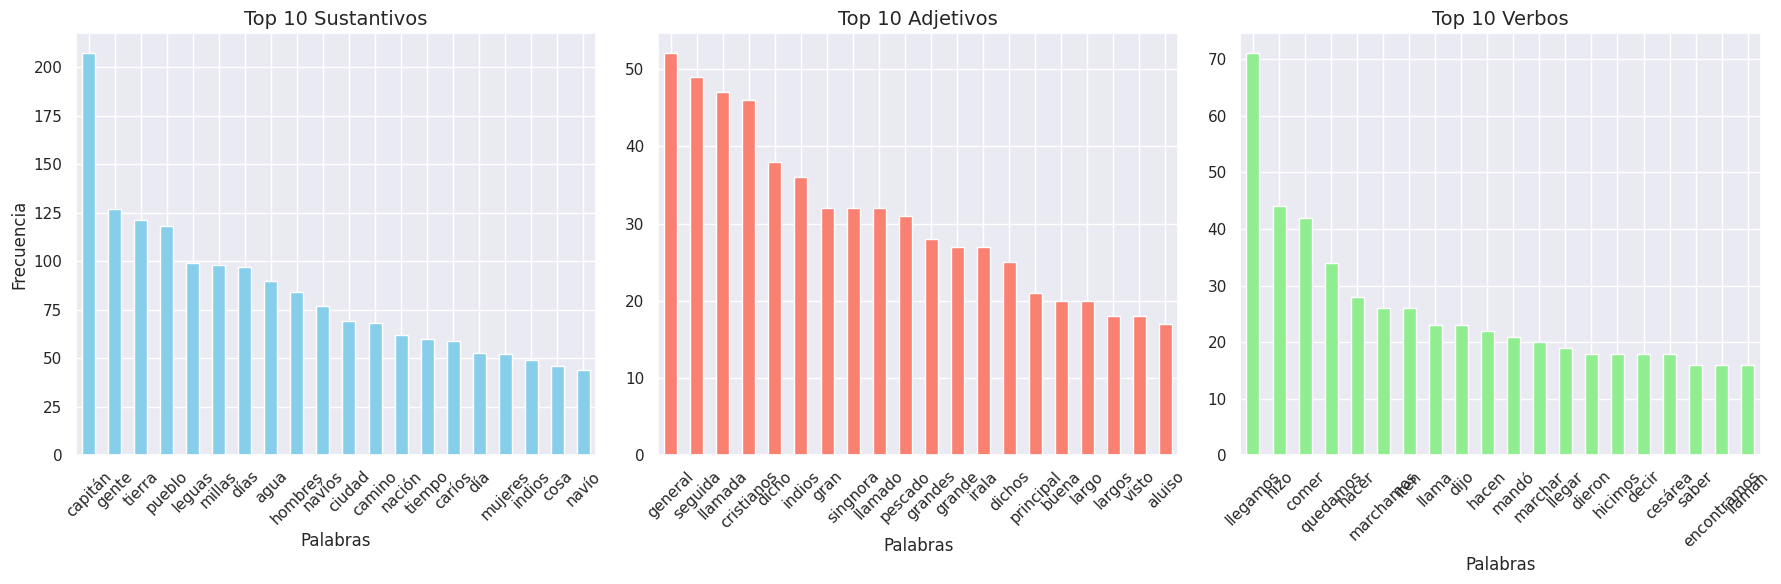

In [23]:

sns.set_style("darkgrid")

plt.figure(figsize=(18, 6))

# Gráfico de Sustantivos
plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sustantivos', fontsize=14)
plt.xlabel('Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)

# Gráfico de Adjetivos
plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='salmon')
plt.title('Top 10 Adjetivos', fontsize=14)
plt.xlabel('Palabras', fontsize=12)
plt.xticks(rotation=45)

# Gráfico de Verbos
plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Verbos', fontsize=14)
plt.xlabel('Palabras', fontsize=12)
plt.xticks(rotation=45)

# Ajustar espaciado y mostrar gráficos
plt.tight_layout()
plt.show()

In [27]:

import spacy

# Load Spanish and German models
nlp_es = spacy.load("es_core_news_md")
# You'll need to download the German model if you haven't already:


def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp_es(text)
    else:
        raise ValueError("Unsupported language. Choose 'es' or 'de'.")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


# Read the text file
with open("/content/ulrico_schmidel_final.txt", "r", encoding="utf-8") as file:
    text = file.read()

#Find names and places in Spanish
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Spanish Names:", spanish_names)
print("Spanish Places:", spanish_places)


Spanish Names: ['Cristo', 'Señor', 'Redentor', 'Ulerich Schmidel', 'Straubing', 'Hispaniam', 'Pietro Mandossa', 'Sewastian Neithart', 'Jacoben Welser de Niremburgo', 'Heinrich Paimen', 'Alto-Alemanes', 'Sannt Bartholomei', 'Polmant', 'Españoles', 'Pietro Manthossa', 'Jerg Manthossa', 'Pietro Manthossa', 'Jerg Manthossa', 'Heinrich Paimen', 'Heinrich Paimen', 'Hainrich Paimen', 'Jerg Manthossa', 'Jerg Manthossa', 'Jerg Manthossa', 'San Jacob', 'Polman', 'pes espade', 'Fué', 'Pietro Manthossa', 'Hanss Ossorio', 'Juan de Osorio', 'Hans', 'Juan) Ossorio', 'Pietro Manthossa', 'Pietro Manthossa', 'Pietro Manthossa', 'Joan Eyolas', 'Hanns Salesser', 'Juan Salazar', 'Jerg Luchllem', 'Jorge Luján', 'Lazarus Sallvaischo', 'Hanns Assario', 'Juan Osorio', 'Osorio', 'Sannt Gabriehel', 'San Gabriel', 'Parnau', 'Pietro Manthossa', 'Pietro Manthossa', 'Bonas Ayers', 'gueter windt', 'Carendies', 'Cardes', 'Carendies', 'Pietro Manthossa', 'Johann Pabón', 'Pietro Manthossa', 'Diego Manthossa', 'Indios Ca

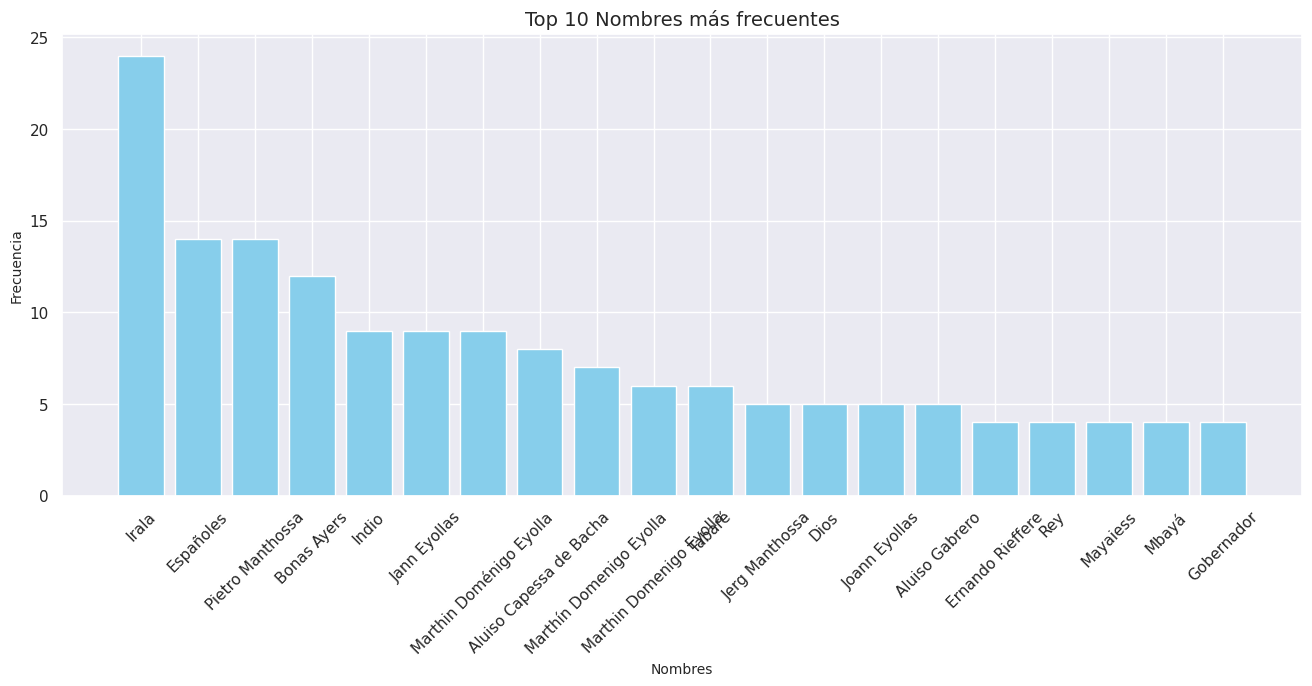

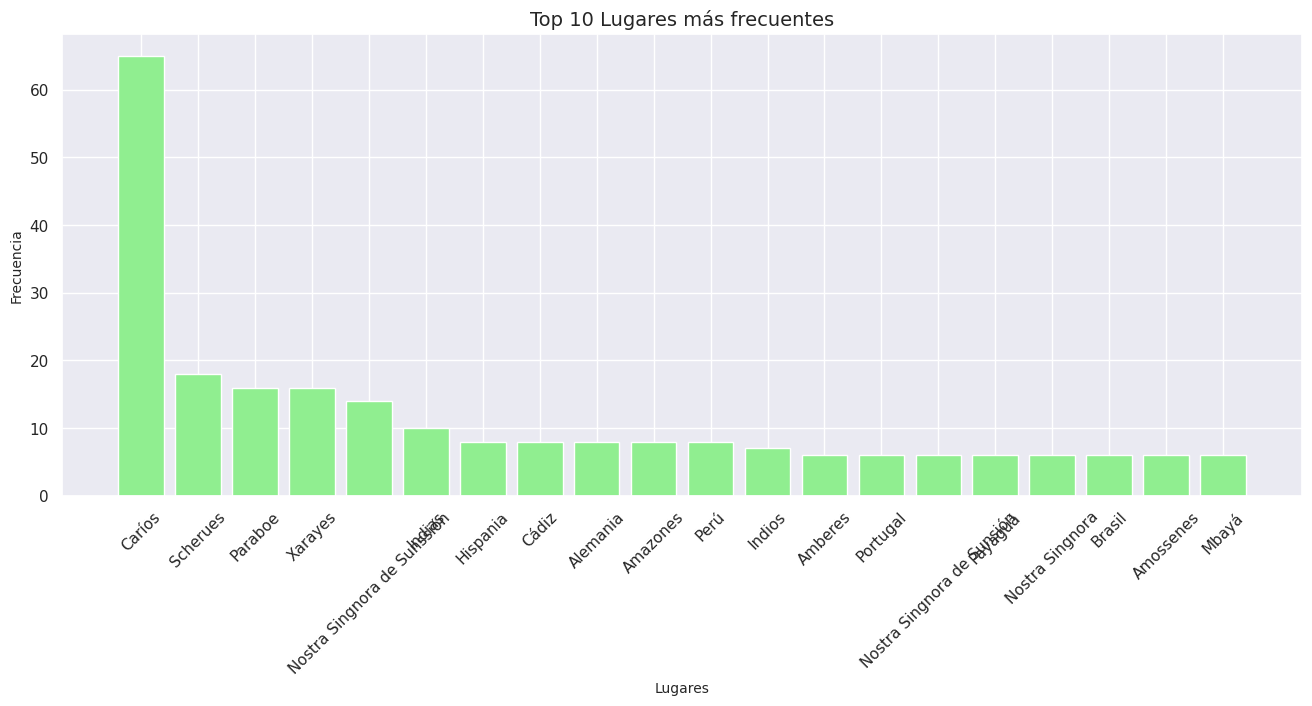

In [32]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

# Convertir los resultados a listas para graficar
names, name_freqs = zip(*name_counts.most_common(20))
places, place_freqs = zip(*place_counts.most_common(20))

# Graficar los nombres
plt.figure(figsize=(16, 6))
plt.bar(names, name_freqs, color='skyblue')
plt.title('Top 10 Nombres más frecuentes', fontsize=14)
plt.xlabel('Nombres', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(rotation=45)
plt.show()

# Graficar los lugares
plt.figure(figsize=(16, 6))
plt.bar(places, place_freqs, color='lightgreen')
plt.title('Top 10 Lugares más frecuentes', fontsize=14)
plt.xlabel('Lugares', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(rotation=45)
plt.show()
